## Install Libaries

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.9/757.9 kB 12.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

## Import Libraries

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

import glob

In [54]:
# for setting locale
import locale
locale.getpreferredencoding = lambda: "UTF-8"

## Dataset Preparation

Dataset Link: https://data.mendeley.com/datasets/8h3s6jkyff/1

In [ ]:
# create the `datasets/` directory
!mkdir datasets

In [ ]:
# download the dataset from roboflow
!curl -L "https://app.roboflow.com/ds/ZWaKV8wcrp?key=4W8fjtf4rE" > dataset.zip

# extract the dataset zip to the `datasets/` directory
!unzip -q dataset.zip -d datasets/

# delete the dataset zip
!rm dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   2306      0 --:--:-- --:--:-- --:--:--  2309
100 34.5M  100 34.5M    0     0  7428k      0  0:00:04  0:00:04 --:--:-- 10.9M


In [ ]:
# initialize some variables for important directories
home = "/content/"
dataset_loc = home + "datasets/"
descriptor_location = dataset_loc + "data.yaml"

## Model Download and Setup

In [ ]:
# download YOLOv9c model from pretrained weight
model = YOLO("yolov9c.pt")

# display model information
model.info()

100%|██████████| 49.4M/49.4M [00:00<00:00, 451MB/s]


YOLOv9c summary: 618 layers, 25590912 parameters, 0 gradients, 104.0 GFLOPs


(618, 25590912, 0, 104.02268160000003)

## Training with Custom Dataset

In [ ]:
# train the model on the Tomato dataset for 30 epochs
train_results = model.train(data=descriptor_location, epochs=30, imgsz=640, plots=True)

Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/content/datasets/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 103MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 241MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/datasets/train/labels... 364 images, 0 backgrounds, 0 corrupt: 100%|██████████| 364/364 [00:00<00:00, 1631.65it/s]

train: New cache created: /content/datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/valid/labels... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<00:00, 1222.65it/s]

val: New cache created: /content/datasets/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      11.4G      1.341       2.01      1.327        222        640: 100%|██████████| 23/23 [00:29<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]

                   all         78       1325      0.522      0.702      0.621      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      11.2G      1.162      1.004      1.165        352        640: 100%|██████████| 23/23 [00:19<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all         78       1325      0.613      0.656      0.621      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      11.3G      1.172     0.9916      1.192        206        640: 100%|██████████| 23/23 [00:19<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]

                   all         78       1325      0.464      0.583      0.447      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      11.3G      1.176      0.866      1.186        317        640: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all         78       1325      0.459       0.57       0.36      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      11.3G      1.188     0.8603      1.208        429        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]

                   all         78       1325      0.253      0.561      0.239       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      11.3G      1.142     0.8065      1.202        219        640: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all         78       1325      0.709      0.679      0.726      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      11.4G      1.136     0.7891      1.174        225        640: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all         78       1325      0.796      0.701      0.774      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      11.3G      1.096     0.7597      1.152        217        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all         78       1325      0.828      0.773      0.838      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      11.2G      1.087     0.7612      1.145        362        640: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]

                   all         78       1325       0.79      0.758      0.814      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      11.3G      1.071     0.7227      1.144        220        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.50it/s]

                   all         78       1325       0.82       0.77      0.848       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      11.1G      1.084     0.7092      1.156        253        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         78       1325      0.889      0.787      0.889      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      11.1G      1.012     0.6411      1.118        289        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all         78       1325      0.848      0.806      0.882      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      11.1G       1.02     0.6404      1.109        314        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         78       1325      0.795      0.802      0.845      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      11.3G      1.003     0.6261      1.116        263        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]

                   all         78       1325      0.865      0.805      0.888      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      11.3G          1     0.6386      1.109        311        640: 100%|██████████| 23/23 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all         78       1325      0.864      0.822      0.886      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      11.3G     0.9904     0.6244      1.113        236        640: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         78       1325      0.861      0.826      0.884      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      11.2G     0.9741     0.6167      1.107        283        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         78       1325      0.876      0.838        0.9      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      11.3G     0.9781     0.5771      1.077        288        640: 100%|██████████| 23/23 [00:18<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all         78       1325      0.871       0.82        0.9      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      11.2G     0.9396      0.566      1.084        305        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]

                   all         78       1325      0.876      0.818      0.898      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      11.3G     0.9427     0.5597      1.083        250        640: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]

                   all         78       1325      0.894      0.822      0.907       0.66


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      11.2G      0.954     0.5646      1.097        178        640: 100%|██████████| 23/23 [00:22<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         78       1325      0.881      0.816      0.895      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      11.2G     0.9308     0.5543      1.077        195        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all         78       1325      0.893      0.844      0.915       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      11.2G     0.8959     0.5221      1.065        163        640: 100%|██████████| 23/23 [00:18<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all         78       1325      0.871      0.844      0.911      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      11.3G     0.8931     0.5371      1.073        199        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all         78       1325      0.847      0.828      0.874      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      11.2G     0.8833     0.5281      1.071        206        640: 100%|██████████| 23/23 [00:18<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         78       1325      0.896      0.823      0.915      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      11.2G     0.8625     0.4883      1.051        234        640: 100%|██████████| 23/23 [00:18<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all         78       1325      0.882      0.845      0.907      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      11.2G     0.8463     0.4686      1.046        171        640: 100%|██████████| 23/23 [00:18<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.50it/s]

                   all         78       1325      0.883      0.848      0.915      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      11.3G     0.8297     0.4664       1.03        186        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all         78       1325      0.879      0.847      0.918      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      11.2G     0.8227     0.4525      1.032        185        640: 100%|██████████| 23/23 [00:18<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all         78       1325      0.891      0.849      0.922       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      11.3G     0.8101     0.4392      1.019        227        640: 100%|██████████| 23/23 [00:18<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all         78       1325      0.907      0.825      0.921      0.683



30 epochs completed in 0.198 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25320790 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]


                   all         78       1325      0.907      0.828      0.921      0.683
                 green         78        937      0.923      0.851      0.938      0.679
                   red         78        388      0.892      0.805      0.905      0.687
Speed: 0.3ms preprocess, 16.0ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/train


### Training Results

In [ ]:
train_results.results_dict

{'metrics/precision(B)': 0.907402408090823,
 'metrics/recall(B)': 0.827762794741887,
 'metrics/mAP50(B)': 0.9212943619912541,
 'metrics/mAP50-95(B)': 0.682650829913016,
 'fitness': 0.7065151831208397}

In [ ]:
!ls /content/runs/detect/train/

args.yaml					   R_curve.png	       val_batch0_labels.jpg
confusion_matrix_normalized.png			   results.csv	       val_batch0_pred.jpg
confusion_matrix.png				   results.png	       val_batch1_labels.jpg
events.out.tfevents.1716456555.cf32b204aa59.433.0  train_batch0.jpg    val_batch1_pred.jpg
F1_curve.png					   train_batch1.jpg    val_batch2_labels.jpg
labels_correlogram.jpg				   train_batch2.jpg    val_batch2_pred.jpg
labels.jpg					   train_batch460.jpg  weights
P_curve.png					   train_batch461.jpg
PR_curve.png					   train_batch462.jpg


/content


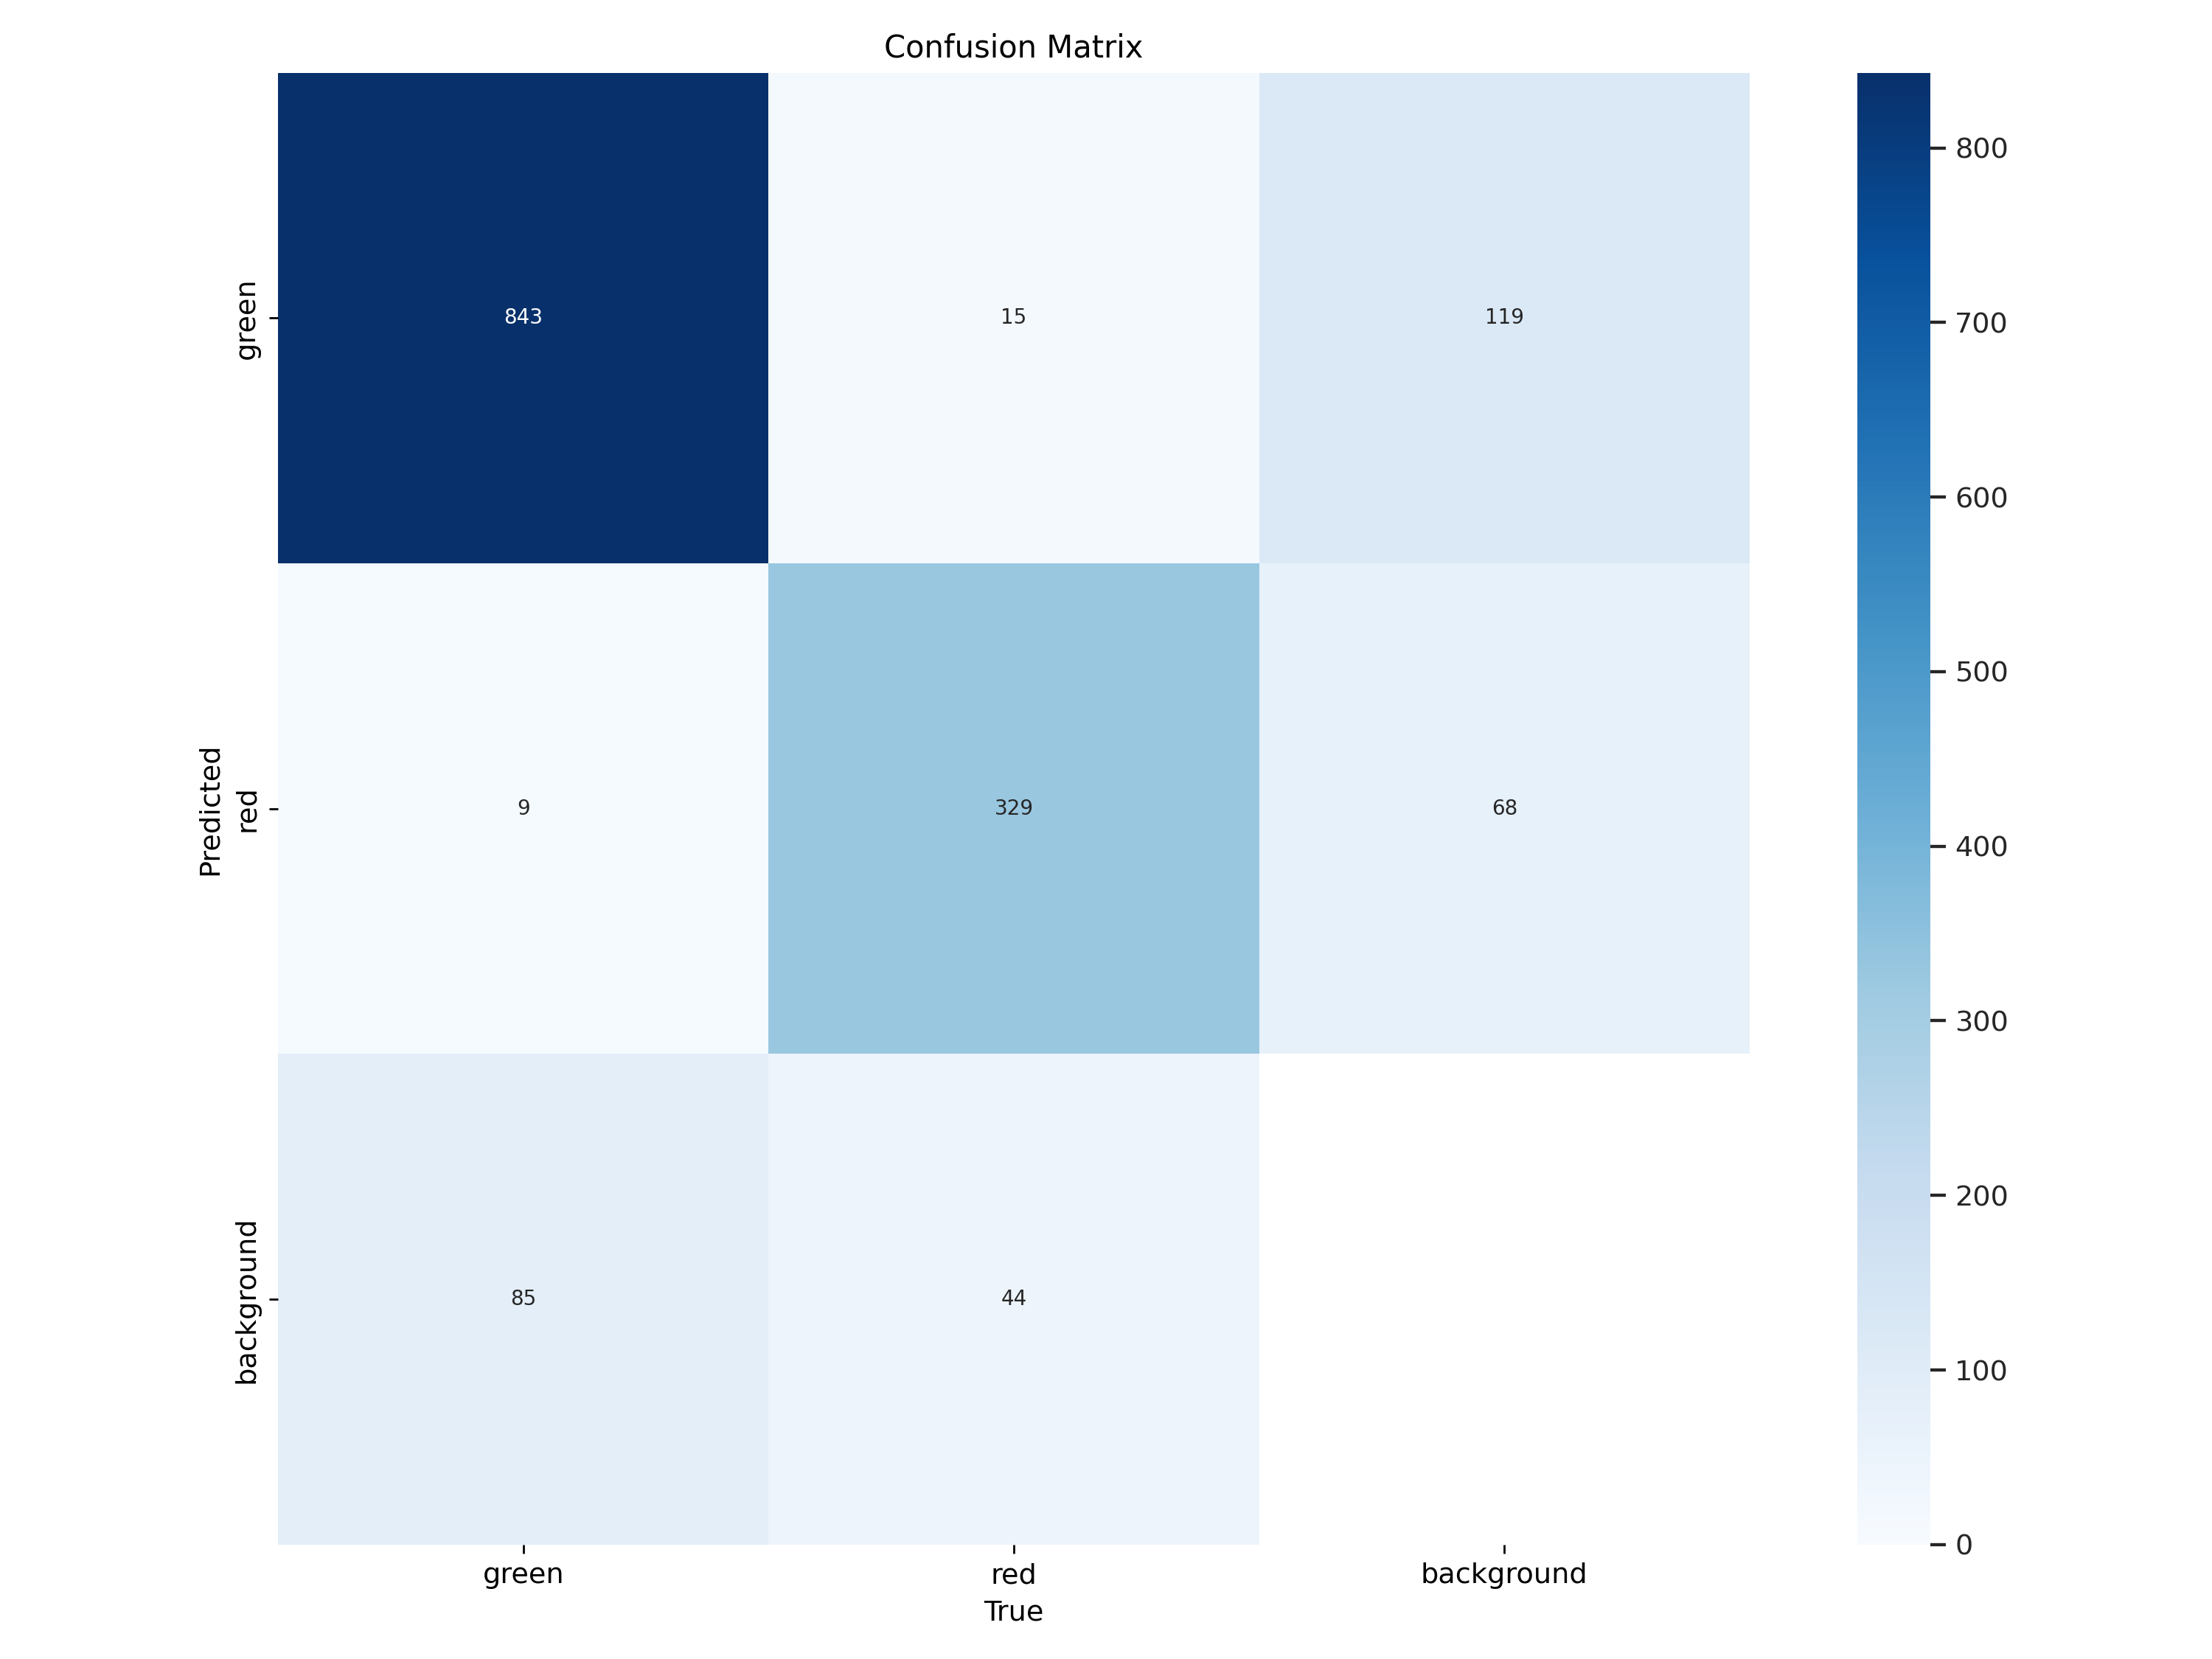

In [ ]:
%cd {home}
Image(filename=f'{home}runs/detect/train/confusion_matrix.png', width=600)

/content


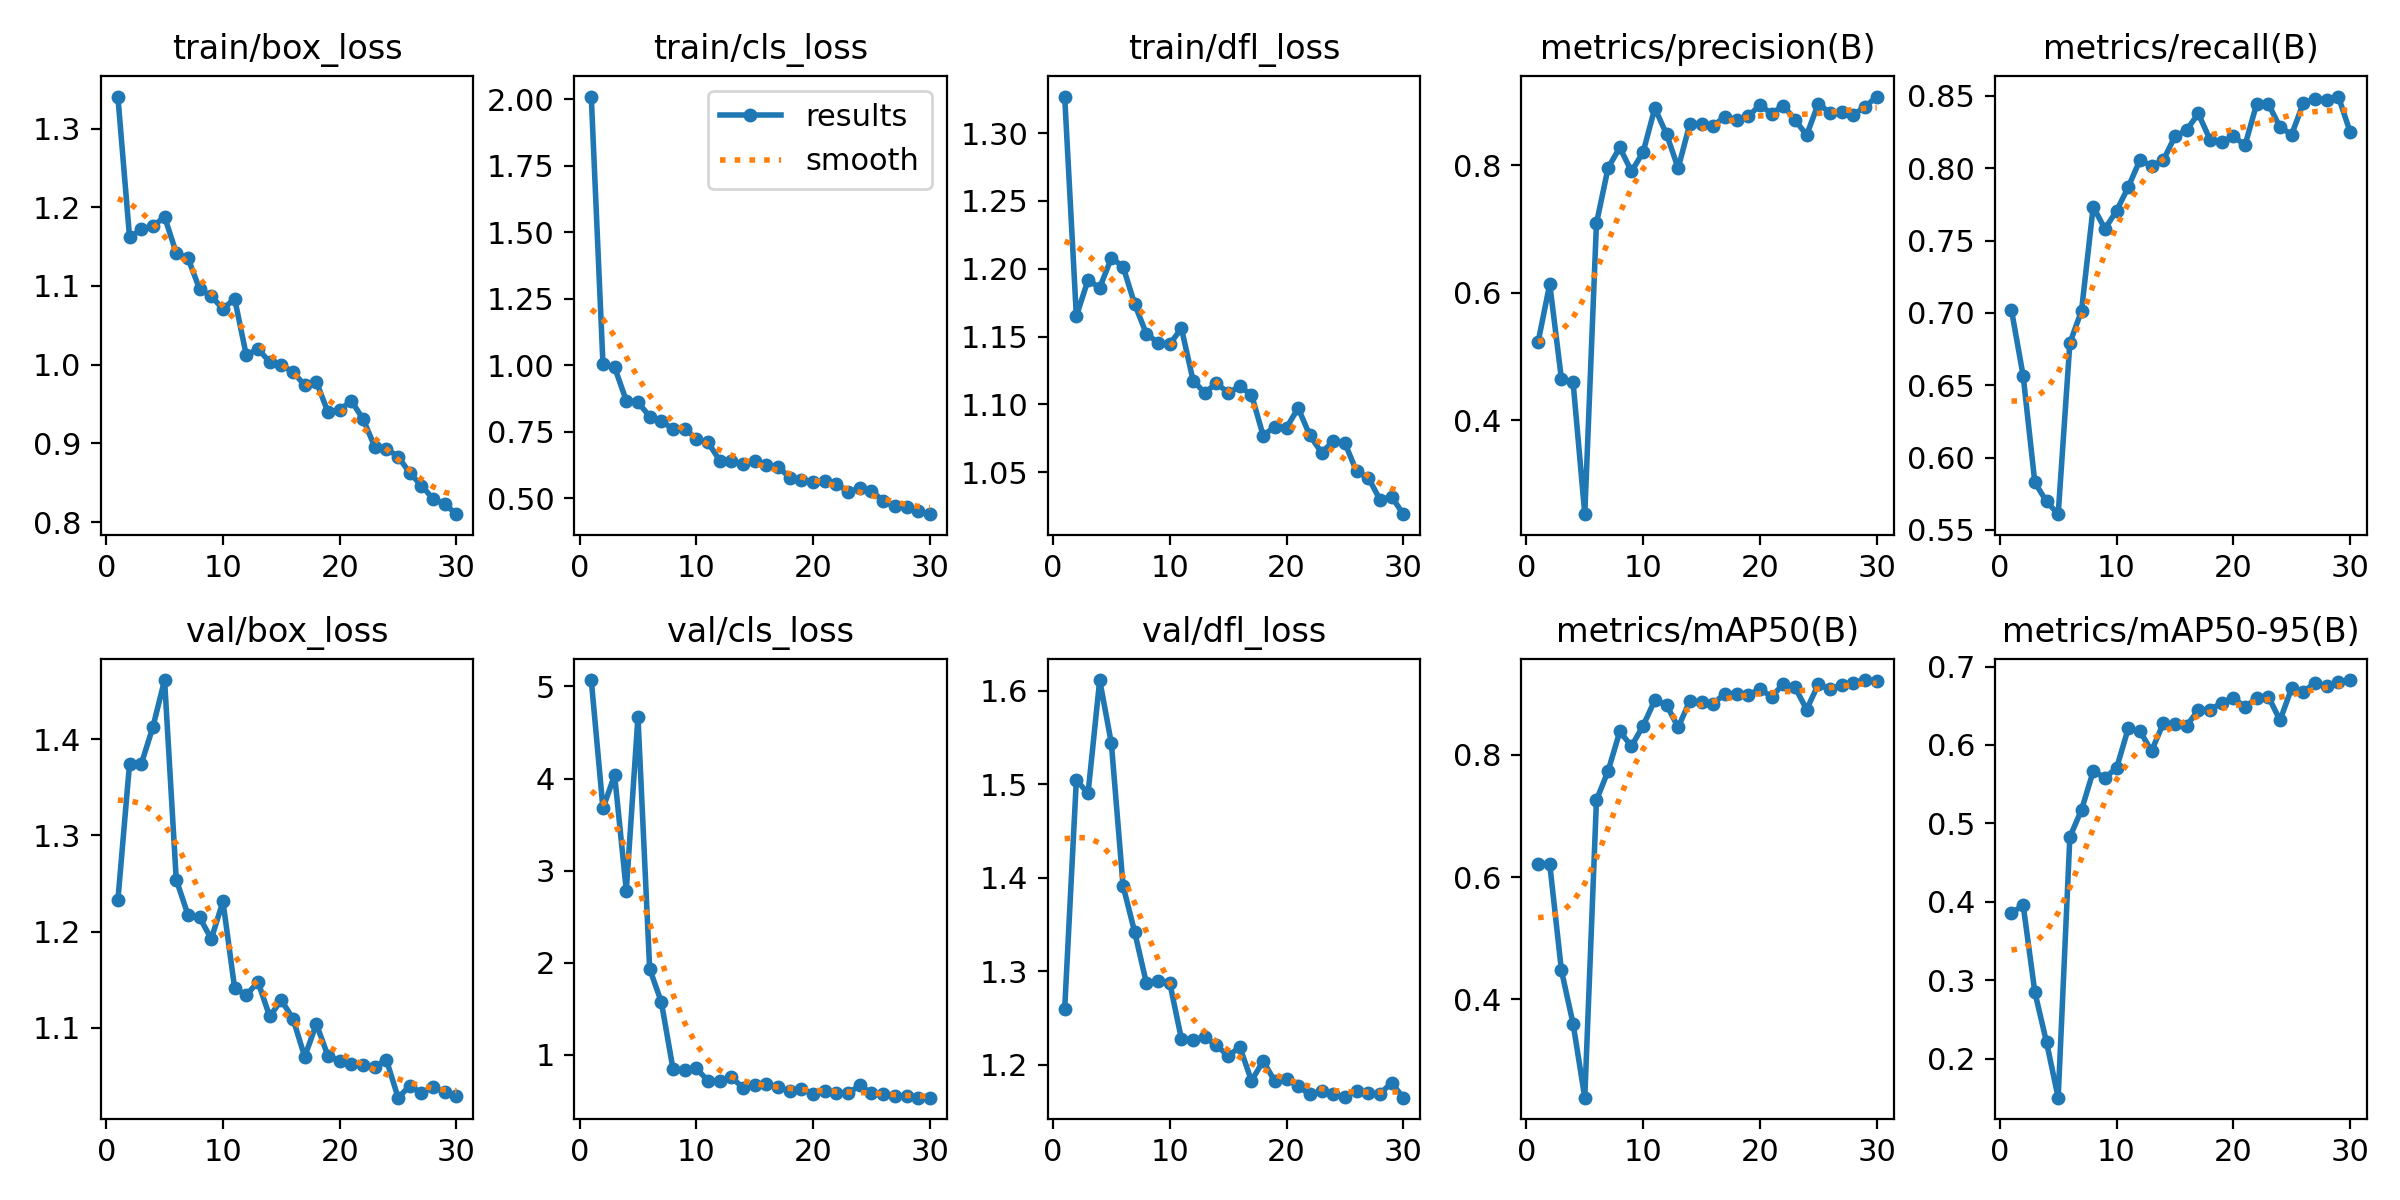

In [ ]:
%cd {home}
Image(filename=f'{home}runs/detect/train/results.png', width=600)

/content


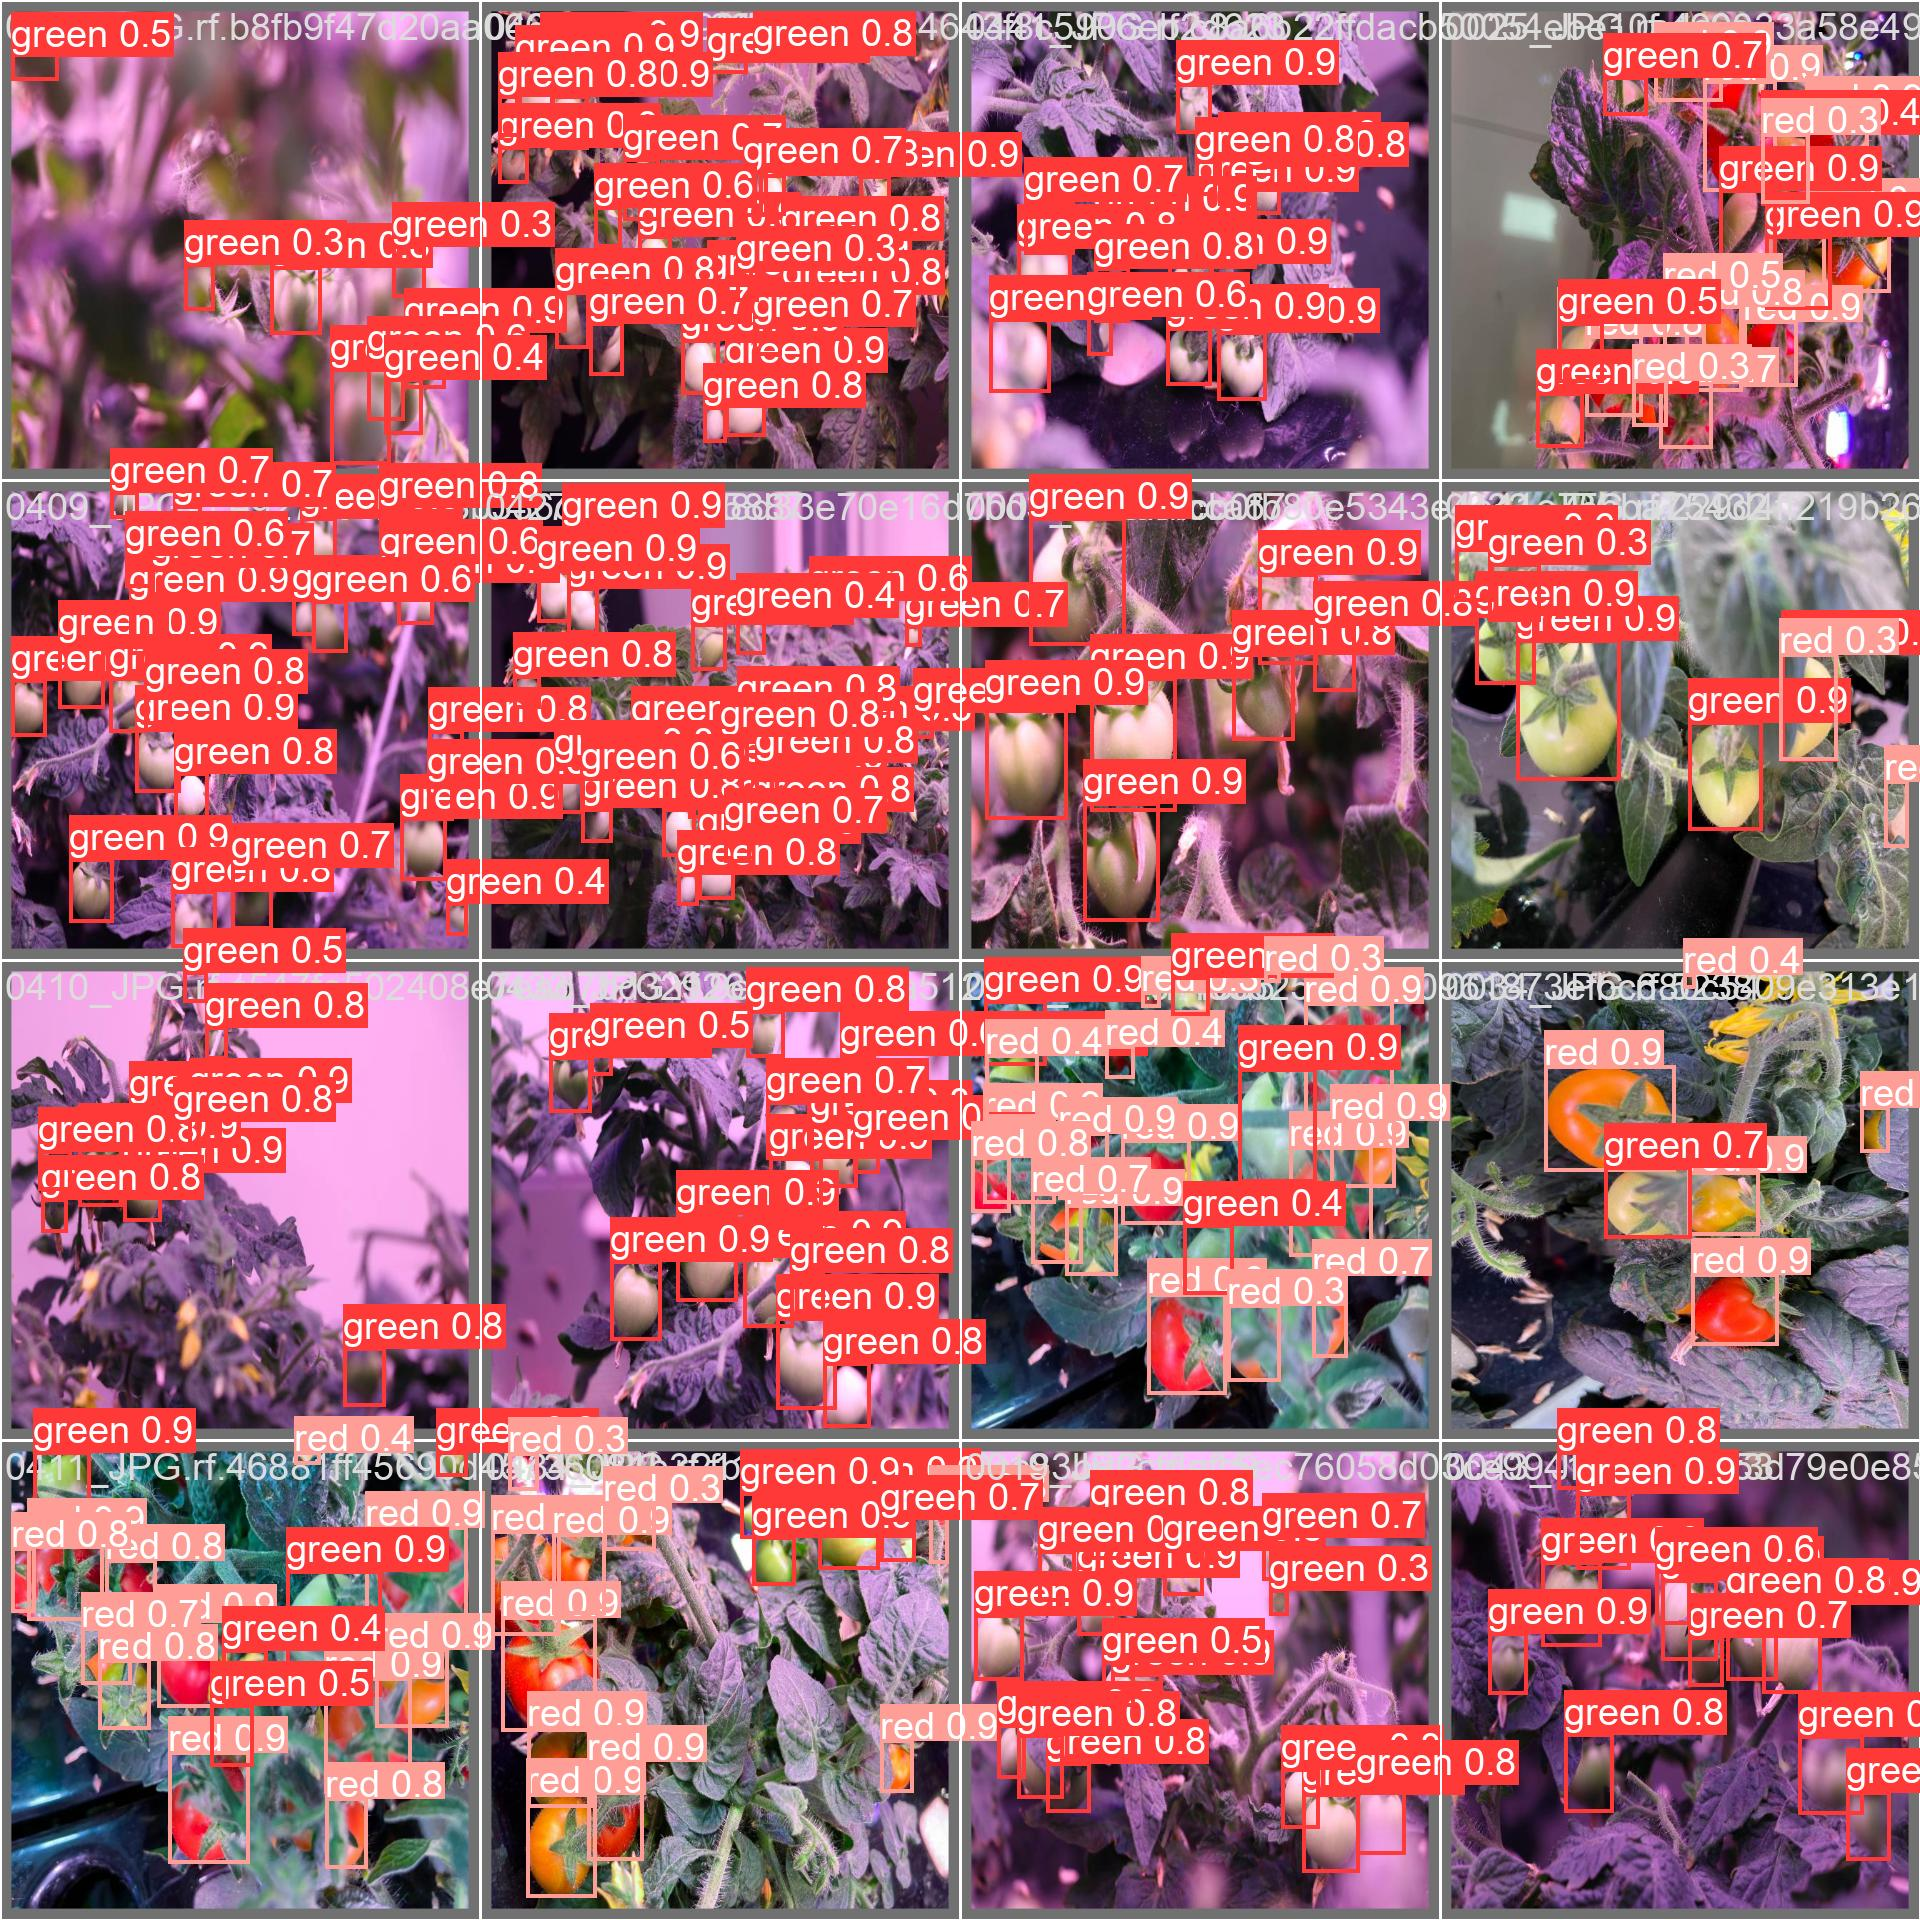

In [ ]:
%cd {home}
Image(filename=f'{home}runs/detect/train/val_batch0_pred.jpg', width=600)

## Validation

In [ ]:
validation_results = model.val()

Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25320790 parameters, 0 gradients, 102.3 GFLOPs


val: Scanning /content/datasets/valid/labels.cache... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.81s/it]


                   all         78       1325      0.907      0.834      0.922      0.683
                 green         78        937      0.919      0.856      0.938      0.678
                   red         78        388      0.895      0.812      0.906      0.688
Speed: 0.6ms preprocess, 54.1ms inference, 0.0ms loss, 10.1ms postprocess per image
Results saved to runs/detect/train2


### Validation Results

In [43]:
validation_results.results_dict

{'metrics/precision(B)': 0.9069374252728091,
 'metrics/recall(B)': 0.8337224953517854,
 'metrics/mAP50(B)': 0.921840272139187,
 'metrics/mAP50-95(B)': 0.6833571632019921,
 'fitness': 0.7072054740957117}

In [44]:
!ls /content/runs/detect/train2/

confusion_matrix_normalized.png  P_curve.png   val_batch0_labels.jpg  val_batch1_pred.jpg
confusion_matrix.png		 PR_curve.png  val_batch0_pred.jpg    val_batch2_labels.jpg
F1_curve.png			 R_curve.png   val_batch1_labels.jpg  val_batch2_pred.jpg


/content


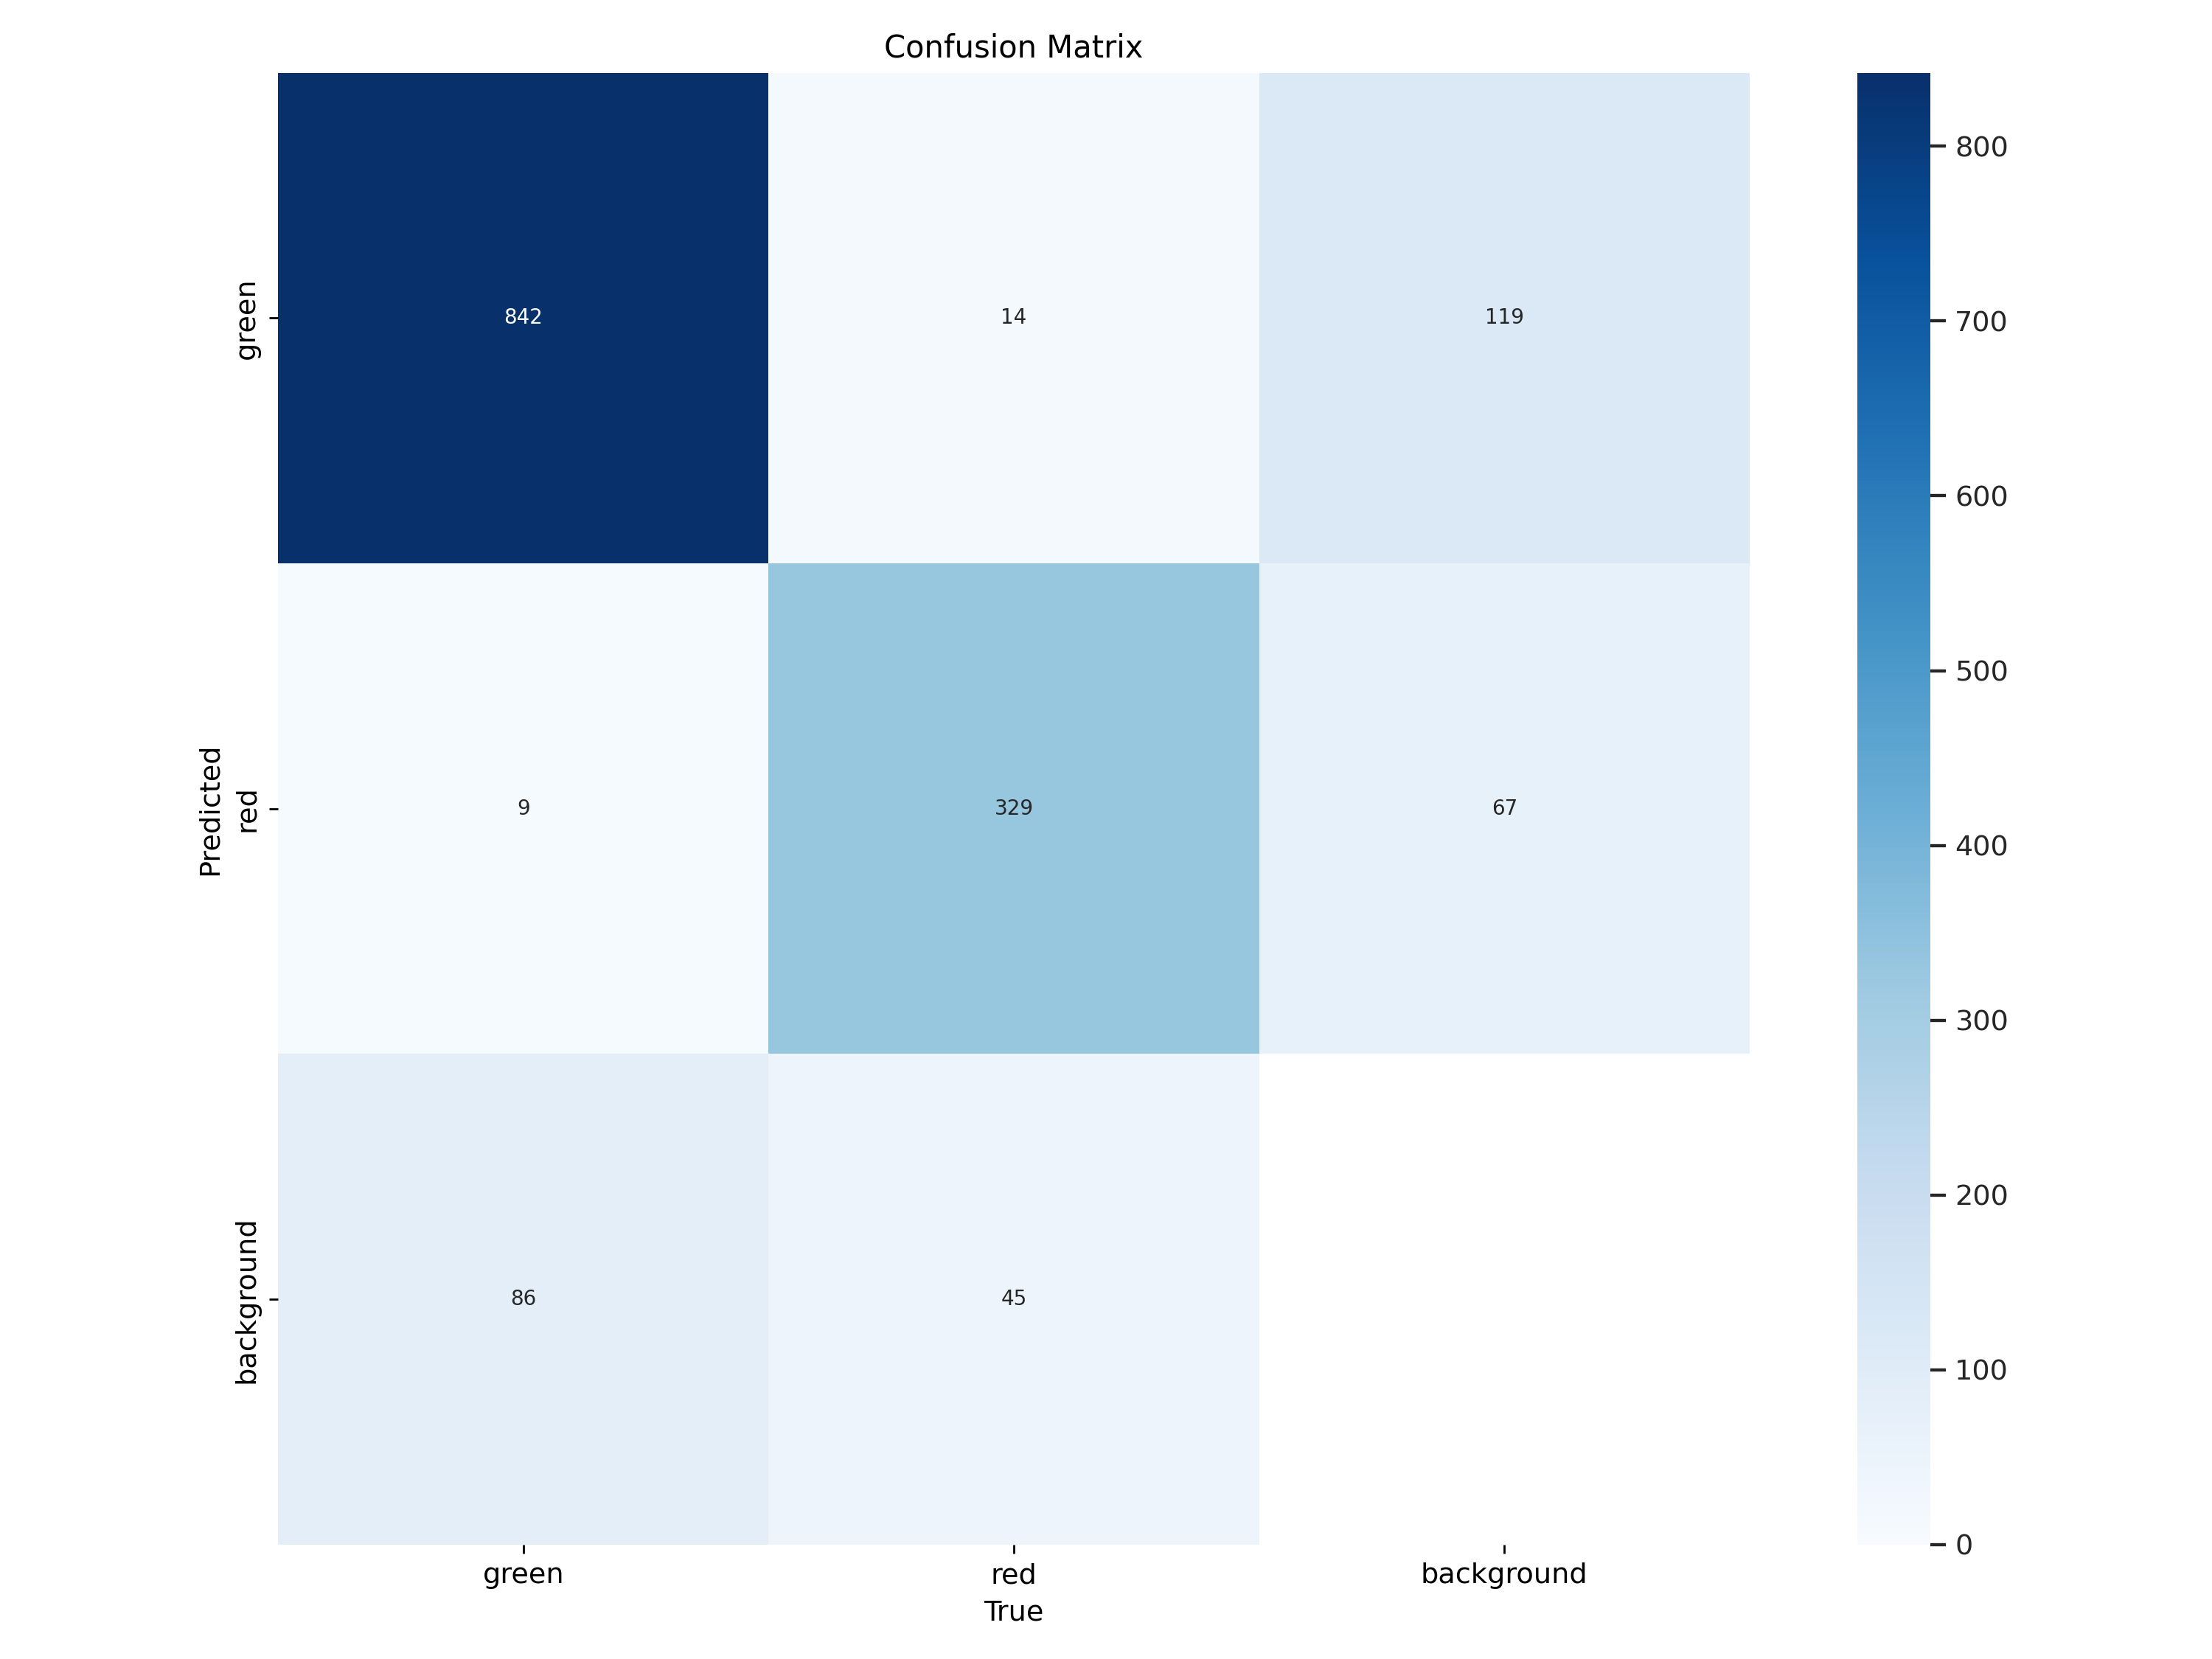

In [45]:
%cd {home}
Image(filename=f'{home}runs/detect/train2/confusion_matrix.png', width=600)

/content


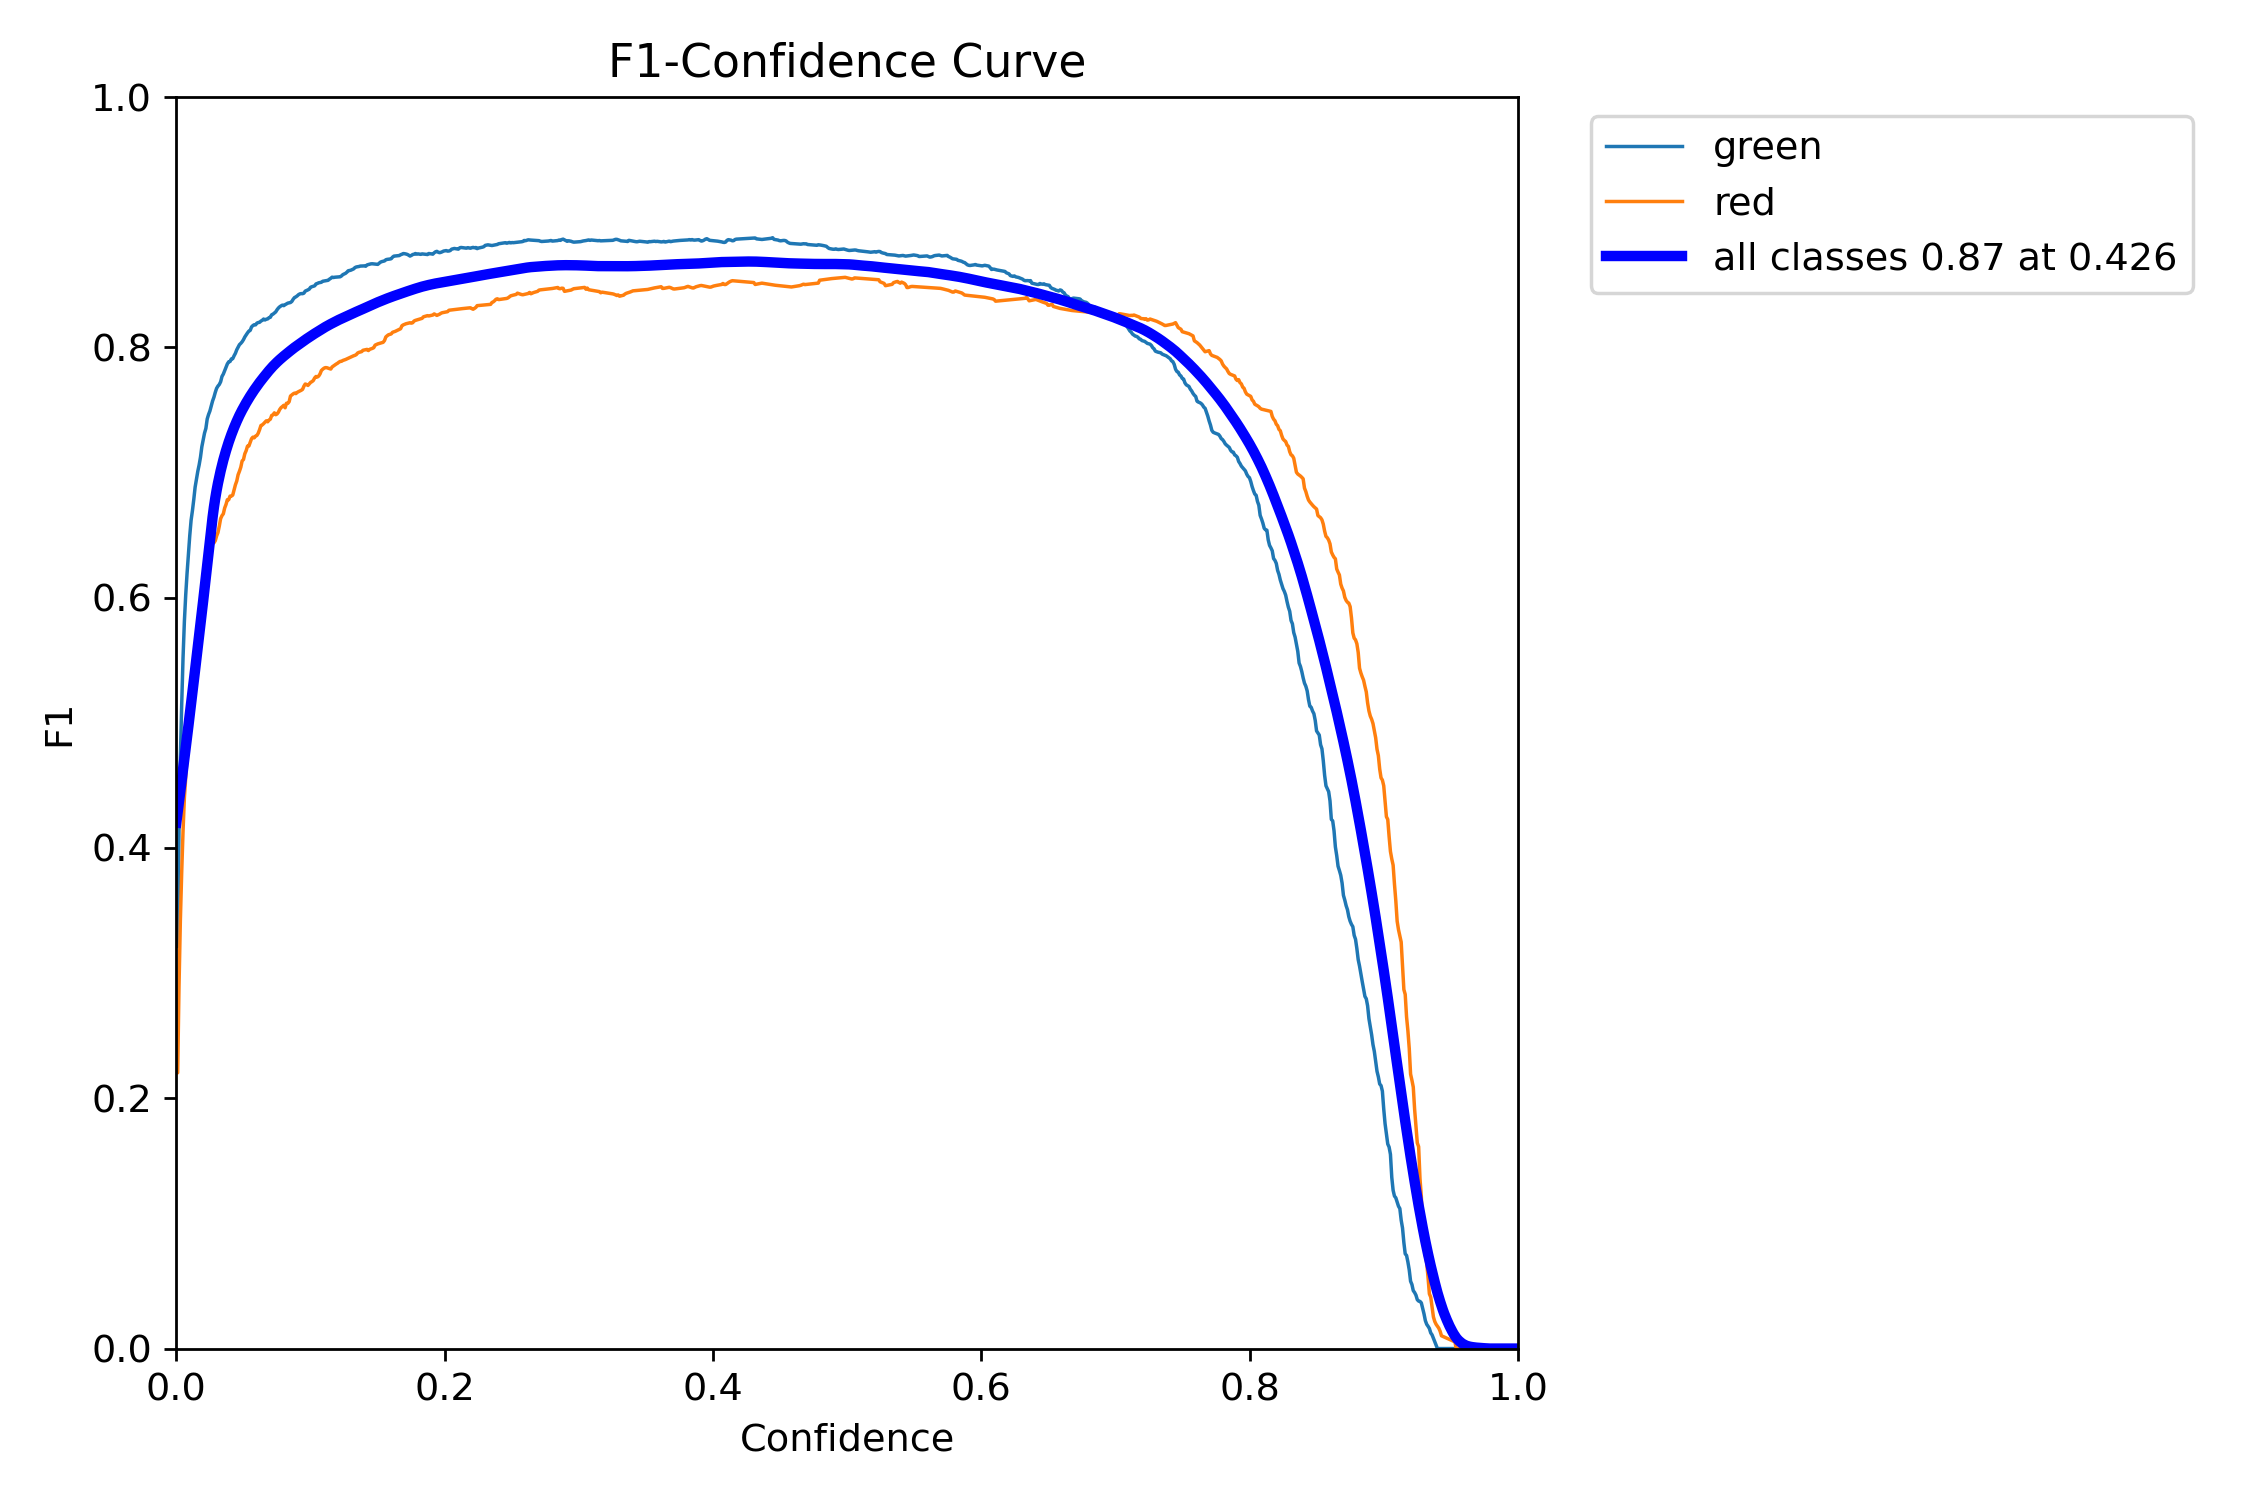

In [48]:
%cd {home}
Image(filename=f'{home}runs/detect/train2/F1_curve.png', width=600)

/content


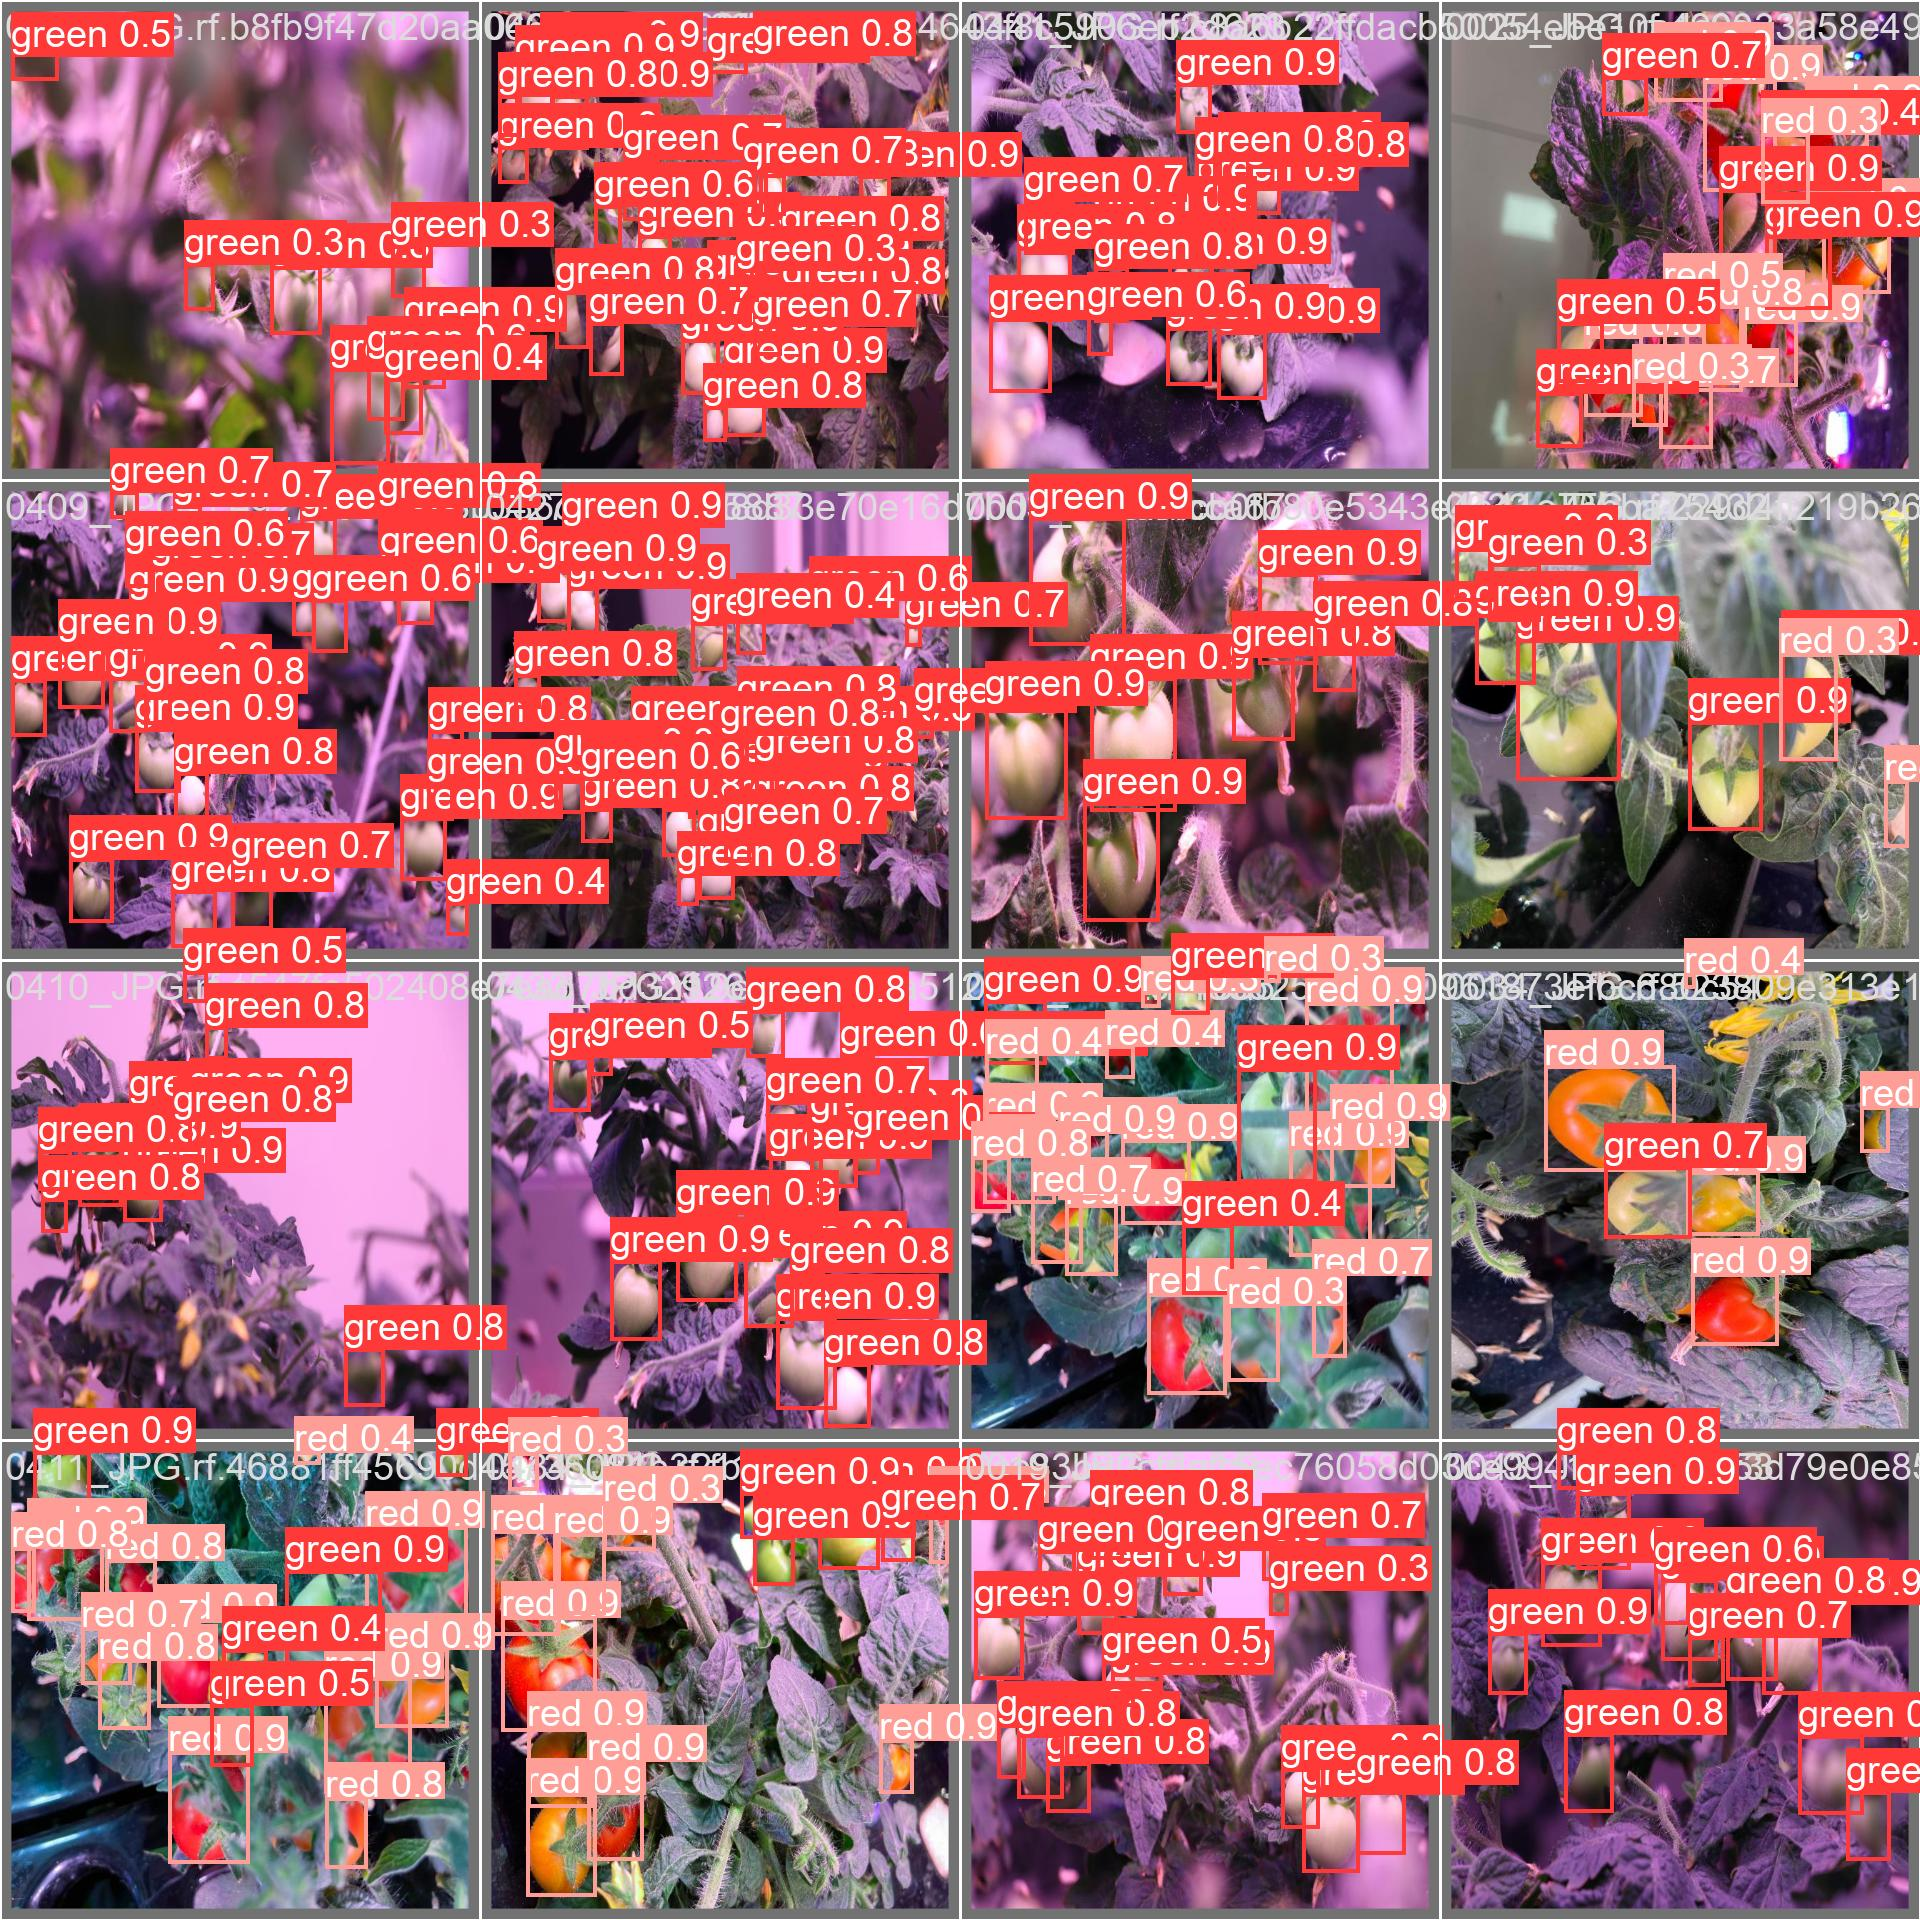

In [47]:
%cd {home}
Image(filename=f'{home}runs/detect/train2/val_batch0_pred.jpg', width=600)

## Inference/Prediction

In [52]:
prediction_results = model.predict(source=dataset_loc + "test/images", save=True)


image 1/78 /content/datasets/test/images/0007_JPG.rf.b13517cf8755eb9c10e0da1472aab893.jpg: 640x640 16 greens, 3 reds, 52.2ms
image 2/78 /content/datasets/test/images/0023_JPG.rf.821348df82bd5edfc6dc5ad604277893.jpg: 640x640 5 greens, 7 reds, 51.9ms
image 3/78 /content/datasets/test/images/0029_JPG.rf.2ca45b2531c2d408da12b05d28d52f27.jpg: 640x640 3 greens, 14 reds, 49.7ms
image 4/78 /content/datasets/test/images/0044_JPG.rf.d5d104c4cdb61bb2bca8e020b9169916.jpg: 640x640 10 greens, 42.2ms
image 5/78 /content/datasets/test/images/0047_JPG.rf.1c2428f520e1a4040ae4c6ccb7e52265.jpg: 640x640 17 greens, 35.6ms
image 6/78 /content/datasets/test/images/0053_JPG.rf.d679281a11b73e61c601755d5f006328.jpg: 640x640 15 greens, 35.5ms
image 7/78 /content/datasets/test/images/0055_JPG.rf.a405d635e84aa1d1599b6c5b597f9ece.jpg: 640x640 16 greens, 35.6ms
image 8/78 /content/datasets/test/images/0072_JPG.rf.d73f6faffad5dbc21e0f89224300ed5d.jpg: 640x640 8 greens, 1 red, 26.3ms
image 9/78 /content/datasets/test/

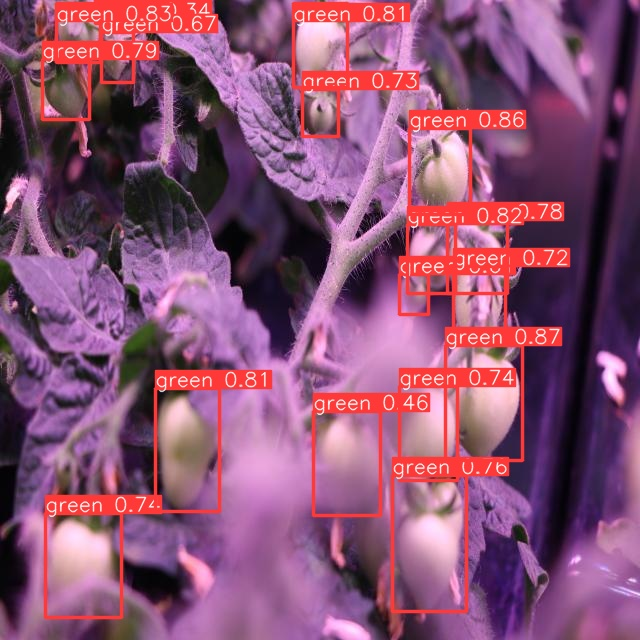

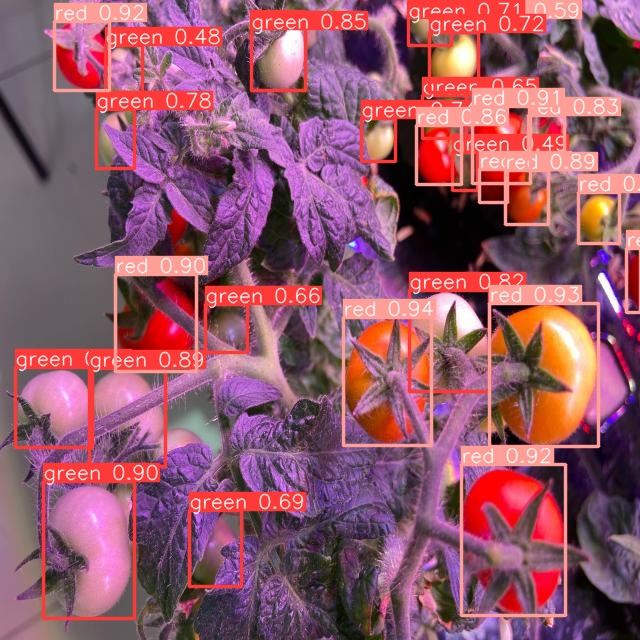

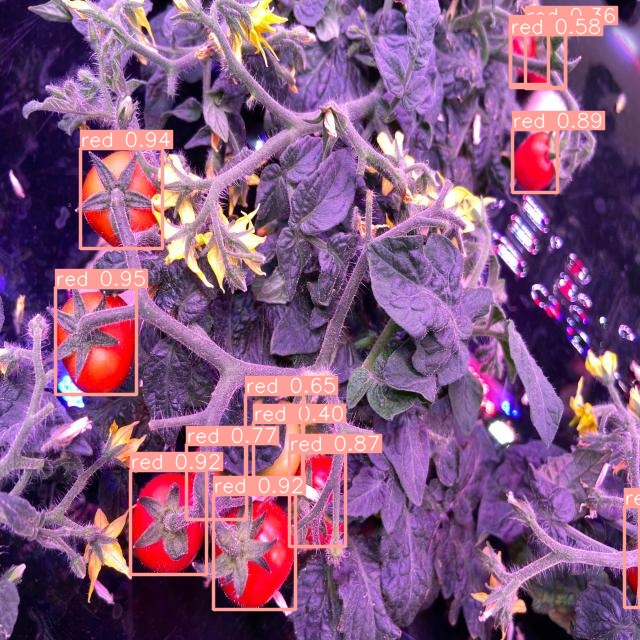

In [53]:
for image_path in glob.glob(f'{home}/runs/detect/train3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")